**Installing lime and shap**

In [2]:
%pip install lime shap

**Importing libraries**

In [4]:
#Importing necessary libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import lime
import lime.lime_tabular
import shap

pd.set_option('display.max_rows', None)

**Loading the dataset into dataframe**


In [5]:
# Loading the dataset and displaying first 5 elements of the data frame
#df = pd.read_csv("bank_data_train.csv")
#df.head()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('./bank_data_train.csv')

In [10]:
df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   ...  REST_DYNAMIC_CC_3M  MED_DEBT_PRC_YWZ  LDEAL_ACT_DAYS_PCT_TR3  \
0  ...                 0.0               NaN                     NaN   
1  ...                 0.0               NaN                     NaN   
2  ...                 0.0               NaN                     NaN   
3  ...                 0.0               NaN                     NaN   
4  ...                 0.0               NaN                     NaN   

  LDEAL_ACT_DAYS_PCT_AAVG  LDEAL_DELINQ_PER_MAXYWZ  TURNOVER_DYNAMIC_CC_3M  \
0                     NaN                      NaN                     0.0   
1                     NaN                      NaN                     0.0   
2                     NaN                      NaN                     0.0   
3                     NaN                      NaN                     0.0   
4                     NaN                      NaN                     0.0   

   LDEAL_ACT_DAYS_PCT_TR  LDEAL_ACT_DAYS_PCT_TR4  LDEAL_ACT_DAYS_PCT_CURR  \
0                    NaN                     NaN                      NaN   
1                    NaN                     NaN                      NaN   
2                    NaN                     NaN                      NaN   
3                    NaN                     NaN                      NaN   
4                    NaN                     NaN                      NaN   

  TARGET  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 116 columns]

**Displaying the shape(row, column count) of the dataframe**

In [11]:
df.shape

(355190, 116)

**Central tendency and other properties of the data frame**

In [12]:
df.describe(include='all')

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  \
count   355190.000000   355190.000000       316867.000000   
unique            NaN             NaN                 NaN   
top               NaN             NaN                 NaN   
freq              NaN             NaN                 NaN   
mean    368794.674875        0.105225            0.044045   
std     128148.804566        0.431372            0.108449   
min     146841.000000        0.000000            0.000000   
25%     257846.250000        0.000000            0.000000   
50%     368778.500000        0.000000            0.000000   
75%     479737.750000        0.000000            0.036608   
max     590828.000000       11.000000            1.000000   

        PRC_ACCEPTS_A_EMAIL_LINK  APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  \
count                   155163.0          60550.000000           155163.0   
unique                       NaN                   NaN                NaN   
top                          NaN                   NaN                NaN   
freq                         NaN                   NaN                NaN   
mean                         0.0             50.947498                0.0   
std                          0.0             21.777855                0.0   
min                          0.0              0.000000                0.0   
25%                          0.0             33.000000                0.0   
50%                          0.0             54.000000                0.0   
75%                          0.0             72.000000                0.0   
max                          0.0             89.000000                0.0   

        PRC_ACCEPTS_A_TK  TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  \
count           155163.0           355190.000000             77112.000000   
unique               NaN                     NaN                      NaN   
top                  NaN                     NaN                      NaN   
freq                 NaN                     NaN                      NaN   
mean                 0.0                0.001305                 0.416896   
std                  0.0                0.029118                 0.316493   
min                  0.0                0.000000                 0.006944   
25%                  0.0                0.000000                 0.166667   
50%                  0.0                0.000000                 0.300000   
75%                  0.0                0.000000                 0.571429   
max                  0.0                1.000000                 1.000000   

        SUM_TRAN_AUT_TENDENCY1M  ...  REST_DYNAMIC_CC_3M  MED_DEBT_PRC_YWZ  \
count              77112.000000  ...       355190.000000      95713.000000   
unique                      NaN  ...                 NaN               NaN   
top                         NaN  ...                 NaN               NaN   
freq                        NaN  ...                 NaN               NaN   
mean                   0.414572  ...            0.007309          0.055074   
std                    0.338612  ...            0.066681          0.215909   
min                    0.000000  ...            0.000000          0.000000   
25%                    0.139645  ...            0.000000          0.000000   
50%                    0.285714  ...            0.000000          0.000000   
75%                    0.661195  ...            0.000000          0.000000   
max                    1.000000  ...            1.000000          1.000000   

        LDEAL_ACT_DAYS_PCT_TR3 LDEAL_ACT_DAYS_PCT_AAVG  \
count             93448.000000            98175.000000   
unique                     NaN                     NaN   
top                        NaN                     NaN   
freq                       NaN                     NaN   
mean                  0.025707                0.049943   
std                   0.115732                0.185830   
min                   0.000000                0.000000   
25%                   0.000000     

# Data Cleaning

**Handling null values**

In [13]:
#screening the columns containing values only with 'NaN' and '0'
nan_values = df.columns[((df == 0) | df.isnull()).all()]
nan_values.values

array(['PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_POS',
       'PRC_ACCEPTS_A_TK', 'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_TK',
       'PRC_ACCEPTS_A_MTP', 'CNT_ACCEPTS_TK', 'PRC_ACCEPTS_A_ATM',
       'PRC_ACCEPTS_MTP', 'CNT_ACCEPTS_MTP'], dtype=object)

**Dropping columns with null values**

In [14]:
#Dropping the columns with 'NaN' and '0' value
df = df.drop(columns=nan_values)
df.shape

(355190, 106)

In [15]:
df = df.sample(n=20000, random_state=42)

**Splitting the data into Train and Test data**

In [16]:
# Split the data
X = df.drop('TARGET', axis = 1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Shape of Train and Test data**

In [17]:
print(X_train.shape)
print(X_test.shape)

(14000, 105)
(6000, 105)


**Handling the duplicate values for Train and Test data**

In [18]:
print(X_train.shape)
duplicates_train = X_train[X_train.duplicated()]
print(duplicates_train.shape)

(14000, 105)
(0, 105)


In [19]:
print(X_test.shape)
duplicates_test = X_test[X_test.duplicated()]
print(duplicates_test.shape)

(6000, 105)
(0, 105)


**Checking unique values of features with data type 'object' to compute values for One Hot Encoding**

In [20]:
df['CLNT_TRUST_RELATION'].unique()

array([nan, 'FRIEND', 'OTHER', 'MOTHER', 'DAUGHTER', 'Друг', 'BROTHER',
       'SISTER', 'RELATIVE', 'SON', 'FATHER', 'Мать', 'Близкий ро',
       'Отец', 'Брат', 'Дочь', 'Сын', 'Сестра'], dtype=object)

In [21]:
df['CLNT_JOB_POSITION'].unique()

array([nan, 'МЕНЕДЖЕР', 'ДИРЕКТОР', ..., 'Ведущий Инженер',
       'ЗАВ.СЕКТОРОМ', 'руководитель сценарного отдела'], dtype=object)

**Analyzing the values of categorical data to check if any value can be changed**

In [22]:
# Creating a dictionary with the russian words to translate the values to english words
russiantoenglish = {
    "MOTHER": "mother",
    "BROTHER": "brother",
    "FRIEND": "friend",
    "SISTER": "sister",
    "OTHER": "other",
    "RELATIVE": "relative",
    "DAUGHTER": "daughter",
    "SON": "son",
    "FATHER": "father",
    "Близкий ро": "close ro",
    "Друг": "friend",
    "Отец": "father",
    "Сестра": "sister",
    "Сын": "son",
    "Мать": "mother",
    "Муж": "husband",
    "Брат": "brother",
    "мать": "mother",
    "Дальний ро": "far ro",
    "Дочь": "daughter",
    "Жена": "wife",
    "начальник отдела": "department head",
    "ГЕНЕРАЛЬНЫЙ ДИРЕКТОР": "ceo",
    "Эксперт контакт Центра": "expert contact center",
    "ПРОХЛДЧИК": "cool",
    "ХУДОЖНИК КОМПЬЮТЕРНОЙ ГРАФИКИ": "computer graphics artist",
    'ВЕДУЩИЙ ЭКОНОМИСТ': 'senior economist',
    'ДИРЕКТОР': 'director',
    'Начальник Управления': 'department head',
    'Торговывы представитель': 'sales representative',
    'ФЕЛЬДШЕР УЧРЕЖДЕНИЯ ФКУ ИК-3 УФСИН': 'paramedic at FKU IK-3 FSIN',
    'Руководитель отдела логистики': 'logistics department head'
}

In [23]:
# Defining a function called russian to convert russian words to english words
def russian(data, translate_columns, russiantoenglish):
    replaced = data.copy()
    for col in translate_columns:
        if col in replaced.columns:
            # Replace Russian words with English in the specified column
            replaced[col] = replaced[col].map(russiantoenglish).fillna(replaced[col])
            # print(replaced[col])
        else:
            print(f"Column '{col}' does not exist in the data.")
    return replaced

# List of columns which should considered for translation
translate_coloums = ['CLNT_TRUST_RELATION', 'CLNT_JOB_POSITION']

# Changing the values of columns for train and test data
X_train = russian(X_train, translate_coloums, russiantoenglish)
X_test = russian(X_test, translate_coloums, russiantoenglish)

**Checking if the data is changed to respective output or not**

In [24]:
X_train['CLNT_TRUST_RELATION'].unique()

array([nan, 'mother', 'relative', 'son', 'brother', 'friend', 'sister',
       'other', 'father', 'daughter', 'close ro'], dtype=object)

In [25]:
X_test['CLNT_TRUST_RELATION'].unique()

array([nan, 'sister', 'brother', 'friend', 'relative', 'son', 'other',
       'mother', 'daughter', 'father', 'close ro'], dtype=object)

In [26]:
X_train['CLNT_JOB_POSITION'].unique()

array([nan, 'Ком.директор', 'Директор', ..., 'ЗАМЕСТИТЕЛЬ БУХГАЛТЕРА',
       'КОНТРОЛЛЕР', 'ЗАМ.РУКОВОДИТЕЛЯ'], dtype=object)

In [27]:
X_test['CLNT_JOB_POSITION'].unique()

array(['Курьер', nan, 'Генеральный директор', ...,
       'ГОСУДАРСТВЕННЫЙ НАЛОГОВЫЙ ИНСПЕКТОР', 'КАССИР-ОПЕРАЦИОНИСТ',
       'управляющий недвижимостью'], dtype=object)

**Computing the sum of null values for every features in the data frame**

In [28]:
null_counts = df.isnull().sum()
print(null_counts)

ID                                 0
CR_PROD_CNT_IL                     0
AMOUNT_RUB_CLO_PRC              2166
APP_REGISTR_RGN_CODE           16548
TURNOVER_DYNAMIC_IL_1M             0
CNT_TRAN_AUT_TENDENCY1M        15728
SUM_TRAN_AUT_TENDENCY1M        15728
AMOUNT_RUB_SUP_PRC              2166
SUM_TRAN_AUT_TENDENCY3M        13796
CLNT_TRUST_RELATION            16010
REST_DYNAMIC_FDEP_1M               0
CNT_TRAN_AUT_TENDENCY3M        13796
APP_MARITAL_STATUS             16106
REST_DYNAMIC_SAVE_3M               0
CR_PROD_CNT_VCU                    0
REST_AVG_CUR                       0
CNT_TRAN_MED_TENDENCY1M        16125
APP_KIND_OF_PROP_HABITATION    16630
CLNT_JOB_POSITION_TYPE         17440
AMOUNT_RUB_NAS_PRC              2166
CLNT_JOB_POSITION               8067
APP_DRIVING_LICENSE            16742
TRANS_COUNT_SUP_PRC             2166
APP_EDUCATION                  16115
CNT_TRAN_CLO_TENDENCY1M        16240
SUM_TRAN_MED_TENDENCY1M        16125
TRANS_COUNT_NAS_PRC             2166
A

In [29]:
# Computing the sum of values of features of train data
null_counts_train = X_train.isnull().sum()
print(null_counts_train)

ID                                 0
CR_PROD_CNT_IL                     0
AMOUNT_RUB_CLO_PRC              1535
APP_REGISTR_RGN_CODE           11574
TURNOVER_DYNAMIC_IL_1M             0
CNT_TRAN_AUT_TENDENCY1M        10994
SUM_TRAN_AUT_TENDENCY1M        10994
AMOUNT_RUB_SUP_PRC              1535
SUM_TRAN_AUT_TENDENCY3M         9668
CLNT_TRUST_RELATION            11227
REST_DYNAMIC_FDEP_1M               0
CNT_TRAN_AUT_TENDENCY3M         9668
APP_MARITAL_STATUS             11253
REST_DYNAMIC_SAVE_3M               0
CR_PROD_CNT_VCU                    0
REST_AVG_CUR                       0
CNT_TRAN_MED_TENDENCY1M        11288
APP_KIND_OF_PROP_HABITATION    11618
CLNT_JOB_POSITION_TYPE         12190
AMOUNT_RUB_NAS_PRC              1535
CLNT_JOB_POSITION               5666
APP_DRIVING_LICENSE            11708
TRANS_COUNT_SUP_PRC             1535
APP_EDUCATION                  11260
CNT_TRAN_CLO_TENDENCY1M        11354
SUM_TRAN_MED_TENDENCY1M        11288
TRANS_COUNT_NAS_PRC             1535
A

In [30]:
# Computing the sum of values of features of test data
null_counts_test = X_test.isnull().sum()
print(null_counts_test)

ID                                0
CR_PROD_CNT_IL                    0
AMOUNT_RUB_CLO_PRC              631
APP_REGISTR_RGN_CODE           4974
TURNOVER_DYNAMIC_IL_1M            0
CNT_TRAN_AUT_TENDENCY1M        4734
SUM_TRAN_AUT_TENDENCY1M        4734
AMOUNT_RUB_SUP_PRC              631
SUM_TRAN_AUT_TENDENCY3M        4128
CLNT_TRUST_RELATION            4783
REST_DYNAMIC_FDEP_1M              0
CNT_TRAN_AUT_TENDENCY3M        4128
APP_MARITAL_STATUS             4853
REST_DYNAMIC_SAVE_3M              0
CR_PROD_CNT_VCU                   0
REST_AVG_CUR                      0
CNT_TRAN_MED_TENDENCY1M        4837
APP_KIND_OF_PROP_HABITATION    5012
CLNT_JOB_POSITION_TYPE         5250
AMOUNT_RUB_NAS_PRC              631
CLNT_JOB_POSITION              2401
APP_DRIVING_LICENSE            5034
TRANS_COUNT_SUP_PRC             631
APP_EDUCATION                  4855
CNT_TRAN_CLO_TENDENCY1M        4886
SUM_TRAN_MED_TENDENCY1M        4837
TRANS_COUNT_NAS_PRC             631
APP_TRAVEL_PASS             

# Feature Dropping

**Dropping Columns with Highest Percentage of Missing Values**

In [31]:
# Defining a function to drop the null columns which is greater than the assigned threshold value
def drop_null_columns(data, null_value_threshold=200000):
  null_counts = data.isnull().sum()
  print(null_counts)
  columns_to_drop = null_counts[null_counts > null_value_threshold].index.tolist()
  print(columns_to_drop)
  return data.drop(columns_to_drop, axis=1)

In [32]:
# Computing the above function for train data
X_train = drop_null_columns(X_train)
print(X_train.shape)

ID                                 0
CR_PROD_CNT_IL                     0
AMOUNT_RUB_CLO_PRC              1535
APP_REGISTR_RGN_CODE           11574
TURNOVER_DYNAMIC_IL_1M             0
CNT_TRAN_AUT_TENDENCY1M        10994
SUM_TRAN_AUT_TENDENCY1M        10994
AMOUNT_RUB_SUP_PRC              1535
SUM_TRAN_AUT_TENDENCY3M         9668
CLNT_TRUST_RELATION            11227
REST_DYNAMIC_FDEP_1M               0
CNT_TRAN_AUT_TENDENCY3M         9668
APP_MARITAL_STATUS             11253
REST_DYNAMIC_SAVE_3M               0
CR_PROD_CNT_VCU                    0
REST_AVG_CUR                       0
CNT_TRAN_MED_TENDENCY1M        11288
APP_KIND_OF_PROP_HABITATION    11618
CLNT_JOB_POSITION_TYPE         12190
AMOUNT_RUB_NAS_PRC              1535
CLNT_JOB_POSITION               5666
APP_DRIVING_LICENSE            11708
TRANS_COUNT_SUP_PRC             1535
APP_EDUCATION                  11260
CNT_TRAN_CLO_TENDENCY1M        11354
SUM_TRAN_MED_TENDENCY1M        11288
TRANS_COUNT_NAS_PRC             1535
A

In [33]:
# Computing the above function for test data
X_test = drop_null_columns(X_test)
print(X_test.shape)

ID                                0
CR_PROD_CNT_IL                    0
AMOUNT_RUB_CLO_PRC              631
APP_REGISTR_RGN_CODE           4974
TURNOVER_DYNAMIC_IL_1M            0
CNT_TRAN_AUT_TENDENCY1M        4734
SUM_TRAN_AUT_TENDENCY1M        4734
AMOUNT_RUB_SUP_PRC              631
SUM_TRAN_AUT_TENDENCY3M        4128
CLNT_TRUST_RELATION            4783
REST_DYNAMIC_FDEP_1M              0
CNT_TRAN_AUT_TENDENCY3M        4128
APP_MARITAL_STATUS             4853
REST_DYNAMIC_SAVE_3M              0
CR_PROD_CNT_VCU                   0
REST_AVG_CUR                      0
CNT_TRAN_MED_TENDENCY1M        4837
APP_KIND_OF_PROP_HABITATION    5012
CLNT_JOB_POSITION_TYPE         5250
AMOUNT_RUB_NAS_PRC              631
CLNT_JOB_POSITION              2401
APP_DRIVING_LICENSE            5034
TRANS_COUNT_SUP_PRC             631
APP_EDUCATION                  4855
CNT_TRAN_CLO_TENDENCY1M        4886
SUM_TRAN_MED_TENDENCY1M        4837
TRANS_COUNT_NAS_PRC             631
APP_TRAVEL_PASS             

**Dropping columns that does not provide much information**

In [34]:
X_train.drop(['ID','CLNT_JOB_POSITION'], axis=1, inplace=True)
X_test.drop(['ID','CLNT_JOB_POSITION'], axis=1, inplace=True)
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 208730 to 216853
Columns: 103 entries, CR_PROD_CNT_IL to LDEAL_ACT_DAYS_PCT_CURR
dtypes: float64(84), int64(7), object(12)
memory usage: 11.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 333103 to 70171
Columns: 103 entries, CR_PROD_CNT_IL to LDEAL_ACT_DAYS_PCT_CURR
dtypes: float64(84), int64(7), object(12)
memory usage: 4.8+ MB
None


**Filling Missing Values**

In [35]:
# Fill remaining missing values with appropriate statistics
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        #X_train[column].fillna(X_train[column].mode()[0], inplace=True)
        X_train[column].fillna('None', inplace=True)
    else:
        X_train[column].fillna(X_train[column].mean(), inplace=True)

for column in X_test.columns:
    if X_test[column].dtype == 'object':
        #X_test[column].fillna(X_test[column].mode()[0], inplace=True)
        X_test[column].fillna('None', inplace=True)
    else:
        X_test[column].fillna(X_test[column].mean(), inplace=True)

In [36]:
# Displaying ten elements of the feature 'PACK'
X_train['PACK'].head(10)

208730    102
218981    107
84898     102
102970    K01
201880    O01
141526    105
207743    102
212817    O01
136922    O01
217459    K01
Name: PACK, dtype: object

# EDA (Exploratory Data Analysis)

**Getting the numerical and categorical features for both train and test data**

In [37]:
numerical_train_df = X_train.select_dtypes(include=['int64', 'float64'])
categorical_train_df = X_train.select_dtypes(include=['object'])

numerical_test_df = X_test.select_dtypes(include=['int64', 'float64'])
categorical_test_df = X_test.select_dtypes(include=['object'])


**Displaying the numerical and categorical features of the training data**

In [38]:
print(numerical_train_df.columns)
print(categorical_train_df.columns)

Index(['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'APP_REGISTR_RGN_CODE',
       'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_RUB_SUP_PRC',
       'SUM_TRAN_AUT_TENDENCY3M', 'REST_DYNAMIC_FDEP_1M',
       'CNT_TRAN_AUT_TENDENCY3M', 'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU',
       'REST_AVG_CUR', 'CNT_TRAN_MED_TENDENCY1M', 'AMOUNT_RUB_NAS_PRC',
       'TRANS_COUNT_SUP_PRC', 'CNT_TRAN_CLO_TENDENCY1M',
       'SUM_TRAN_MED_TENDENCY1M', 'TRANS_COUNT_NAS_PRC', 'CR_PROD_CNT_TOVR',
       'CR_PROD_CNT_PIL', 'SUM_TRAN_CLO_TENDENCY1M', 'TURNOVER_CC',
       'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 'TURNOVER_PAYM', 'AGE',
       'CNT_TRAN_MED_TENDENCY3M', 'CR_PROD_CNT_CC', 'SUM_TRAN_MED_TENDENCY3M',
       'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M', 'SUM_TRAN_CLO_TENDENCY3M',
       'LDEAL_TENOR_MAX', 'LDEAL_YQZ_CHRG', 'CR_PROD_CNT_CCFP',
       'DEAL_YQZ_IR_MAX', 'LDEAL_YQZ_COM', 'DEAL_YQZ_IR_MIN',
       'CNT_TRAN_CLO_TENDENCY3M', 'REST_DYN

**Computing the skewness of the numerical feature of training data**

**Skewness**

In [39]:
numerical_train_df.select_dtypes(include=['int64', 'float64']).skew()

CR_PROD_CNT_IL                 6.360710
AMOUNT_RUB_CLO_PRC             4.972953
APP_REGISTR_RGN_CODE          -0.875863
TURNOVER_DYNAMIC_IL_1M        27.784898
CNT_TRAN_AUT_TENDENCY1M        2.012144
SUM_TRAN_AUT_TENDENCY1M        1.634081
AMOUNT_RUB_SUP_PRC             3.286428
SUM_TRAN_AUT_TENDENCY3M       -0.819846
REST_DYNAMIC_FDEP_1M          36.575194
CNT_TRAN_AUT_TENDENCY3M       -0.422996
REST_DYNAMIC_SAVE_3M           3.433367
CR_PROD_CNT_VCU                6.163889
REST_AVG_CUR                  25.394844
CNT_TRAN_MED_TENDENCY1M        1.654521
AMOUNT_RUB_NAS_PRC             7.675519
TRANS_COUNT_SUP_PRC            1.140380
CNT_TRAN_CLO_TENDENCY1M        1.205363
SUM_TRAN_MED_TENDENCY1M        1.165944
TRANS_COUNT_NAS_PRC            4.542157
CR_PROD_CNT_TOVR               2.364977
CR_PROD_CNT_PIL                6.494860
SUM_TRAN_CLO_TENDENCY1M        0.852192
TURNOVER_CC                   24.745490
TRANS_COUNT_ATM_PRC            0.758104
AMOUNT_RUB_ATM_PRC            -0.461125
TURNOVER_PAYM                 14.246333
AGE                            0.663030
CNT_TRAN_MED_TENDENCY3M       -0.543906
CR_PROD_CNT_CC                 5.052231
SUM_TRAN_MED_TENDENCY3M       -1.081534
REST_DYNAMIC_FDEP_3M          13.112288
REST_DYNAMIC_IL_1M            23.054693
SUM_TRAN_CLO_TENDENCY3M       -1.005329
LDEAL_TENOR_MAX               34.094919
LDEAL_YQZ_CHRG                47.512551
CR_PROD_CNT_CCFP              20.327355
DEAL_YQZ_IR_MAX               12.757265
LDEAL_YQZ_COM                 11.800407
DEAL_YQZ_IR_MIN               13.511104
CNT_TRAN_CLO_TENDENCY3M       -0.587942
REST_DYNAMIC_CUR_1M            1.958742
REST_AVG_PAYM                 16.302059
LDEAL_TENOR_MIN               11.483303
LDEAL_AMT_MONTH               49.528950
LDEAL_GRACE_DAYS_PCT_MED      21.505874
REST_DYNAMIC_CUR_3M            0.023189
CNT_TRAN_SUP_TENDENCY3M       -0.068686
TURNOVER_DYNAMIC_CUR_1M        1.837038
REST_DYNAMIC_PAYM_3M           2.774666
SUM_TRAN_SUP_TENDENCY3M       -0.220439
REST_DYNAMIC_IL_3M            11.099042
CNT_TRAN_ATM_TENDENCY3M        0.085100
CNT_TRAN_ATM_TENDENCY1M        1.827381
TURNOVER_DYNAMIC_IL_3M        14.738087
SUM_TRAN_ATM_TENDENCY3M       -0.203986
DEAL_GRACE_DAYS_ACC_S1X1      12.354308
AVG_PCT_MONTH_TO_PCLOSE      -23.576627
DEAL_YWZ_IR_MIN               -2.539669
SUM_TRAN_SUP_TENDENCY1M        1.752577
DEAL_YWZ_IR_MAX               -3.037916
SUM_TRAN_ATM_TENDENCY1M        1.556839
REST_DYNAMIC_PAYM_1M           5.688701
CNT_TRAN_SUP_TENDENCY1M        1.905329
DEAL_GRACE_DAYS_ACC_AVG       13.441115
TURNOVER_DYNAMIC_CUR_3M        0.023609
MAX_PCLOSE_DATE              -10.498717
LDEAL_YQZ_PC                   8.781963
CLNT_SETUP_TENOR               0.536425
DEAL_GRACE_DAYS_ACC_MAX       12.047101
TURNOVER_DYNAMIC_PAYM_3M       3.127960
LDEAL_DELINQ_PER_MAXYQZ        8.550610
TURNOVER_DYNAMIC_PAYM_1M       6.371386
CLNT_SALARY_VALUE             59.714863
TRANS_AMOUNT_TENDENCY3M        0.021566
MED_DEBT_PRC_YQZ             -20.210963
TRANS_CNT_TENDENCY3M           0.197600
LDEAL_USED_AMT_AVG_YQZ         2.137235
REST_DYNAMIC_CC_1M            14.366468
LDEAL_USED_AMT_AVG_YWZ        -5.257731
TURNOVER_DYNAMIC_CC_1M        48.438908
AVG_PCT_DEBT_TO_DEAL_AMT       8.194121
LDEAL_ACT_DAYS_ACC_PCT_AVG     9.512734
REST_DYNAMIC_CC_3M            10.093091
MED_DEBT_PRC_YWZ               7.582657
LDEAL_ACT_DAYS_PCT_TR3        11.909715
LDEAL_ACT_DAYS_PCT_AAVG        8.188002
LDEAL_DELINQ_PER_MAXYWZ       22.281948
TURNOVER_DYNAMIC_CC_3M        19.069384
LDEAL_ACT_DAYS_PCT_TR         16.686932
LDEAL_ACT_DAYS_PCT_TR4        16.686932
LDEAL_ACT_DAYS_PCT_CURR       16.686932
dtype: float64

# Univariate Analysis

**Central Tendency**

In [40]:
numerical_train_df.describe(include='all')

CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  APP_REGISTR_RGN_CODE  \
count    14000.000000        14000.000000          14000.000000   
mean         0.108786            0.045883             50.418384   
std          0.433714            0.107418              9.097901   
min          0.000000            0.000000              1.000000   
25%          0.000000            0.000000             50.418384   
50%          0.000000            0.003860             50.418384   
75%          0.000000            0.045883             50.418384   
max          9.000000            1.000000             89.000000   

       TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  \
count            14000.000000             14000.000000   
mean                 0.001256                 0.409013   
std                  0.026263                 0.143755   
min                  0.000000                 0.020833   
25%                  0.000000                 0.409013   
50%                  0.000000                 0.409013   
75%                  0.000000                 0.409013   
max                  1.000000                 1.000000   

       SUM_TRAN_AUT_TENDENCY1M  AMOUNT_RUB_SUP_PRC  SUM_TRAN_AUT_TENDENCY3M  \
count             14000.000000        14000.000000             14000.000000   
mean                  0.409089            0.085841                 0.691114   
std                   0.154325            0.137553                 0.166902   
min                   0.000585            0.000000                 0.000585   
25%                   0.409089            0.000000                 0.691114   
50%                   0.409089            0.039694                 0.691114   
75%                   0.409089            0.095416                 0.691114   
max                   1.000000            1.000000                 1.000000   

       REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  ...  \
count          14000.000000             14000.000000  ...   
mean               0.000864                 0.692970  ...   
std                0.017005                 0.153677  ...   
min                0.000000                 0.045455  ...   
25%                0.000000                 0.692970  ...   
50%                0.000000                 0.692970  ...   
75%                0.000000                 0.692970  ...   
max                1.000000                 1.000000  ...   

       LDEAL_ACT_DAYS_ACC_PCT_AVG  REST_DYNAMIC_CC_3M  MED_DEBT_PRC_YWZ  \
count                14000.000000        14000.000000      14000.000000   
mean                     0.048525            0.007486          0.053245   
std                      0.064678            0.066728          0.109398   
min                      0.000000            0.000000          0.000000   
25%                      0.048525            0.000000          0.000000   
50%                      0.048525            0.000000          0.053245   
75%                      0.048525            0.000000          0.053245   
max                      1.000000            1.000000          1.000000   

       LDEAL_ACT_DAYS_PCT_TR3  LDEAL_ACT_DAYS_PCT_AAVG  \
count            14000.000000             14000.000000   
mean                 0.024404                 0.047794   
std                  0.056560                 0.095636   
min                  0.000000                 0.000000   
25%                  0.024404                 0.033333   
50%                  0.024404                 0.047794   
75%                  0.024404                 0.047794   
max                  1.000000                 1.000000   

       LDEAL_DELINQ_PER_MAXYWZ  TURNOVER_DYNAMIC_CC_3M  LDEAL_ACT_DAYS_PCT_TR  \
count             14000.000000            14000.000000            14000.00000   
mean                  0.007220                0.002659                0.01366   
std                   0.042723                0.043851                0.04887   
min                   0.000000                0.000000                0.00000   
25%           

**Histogram of distribution**

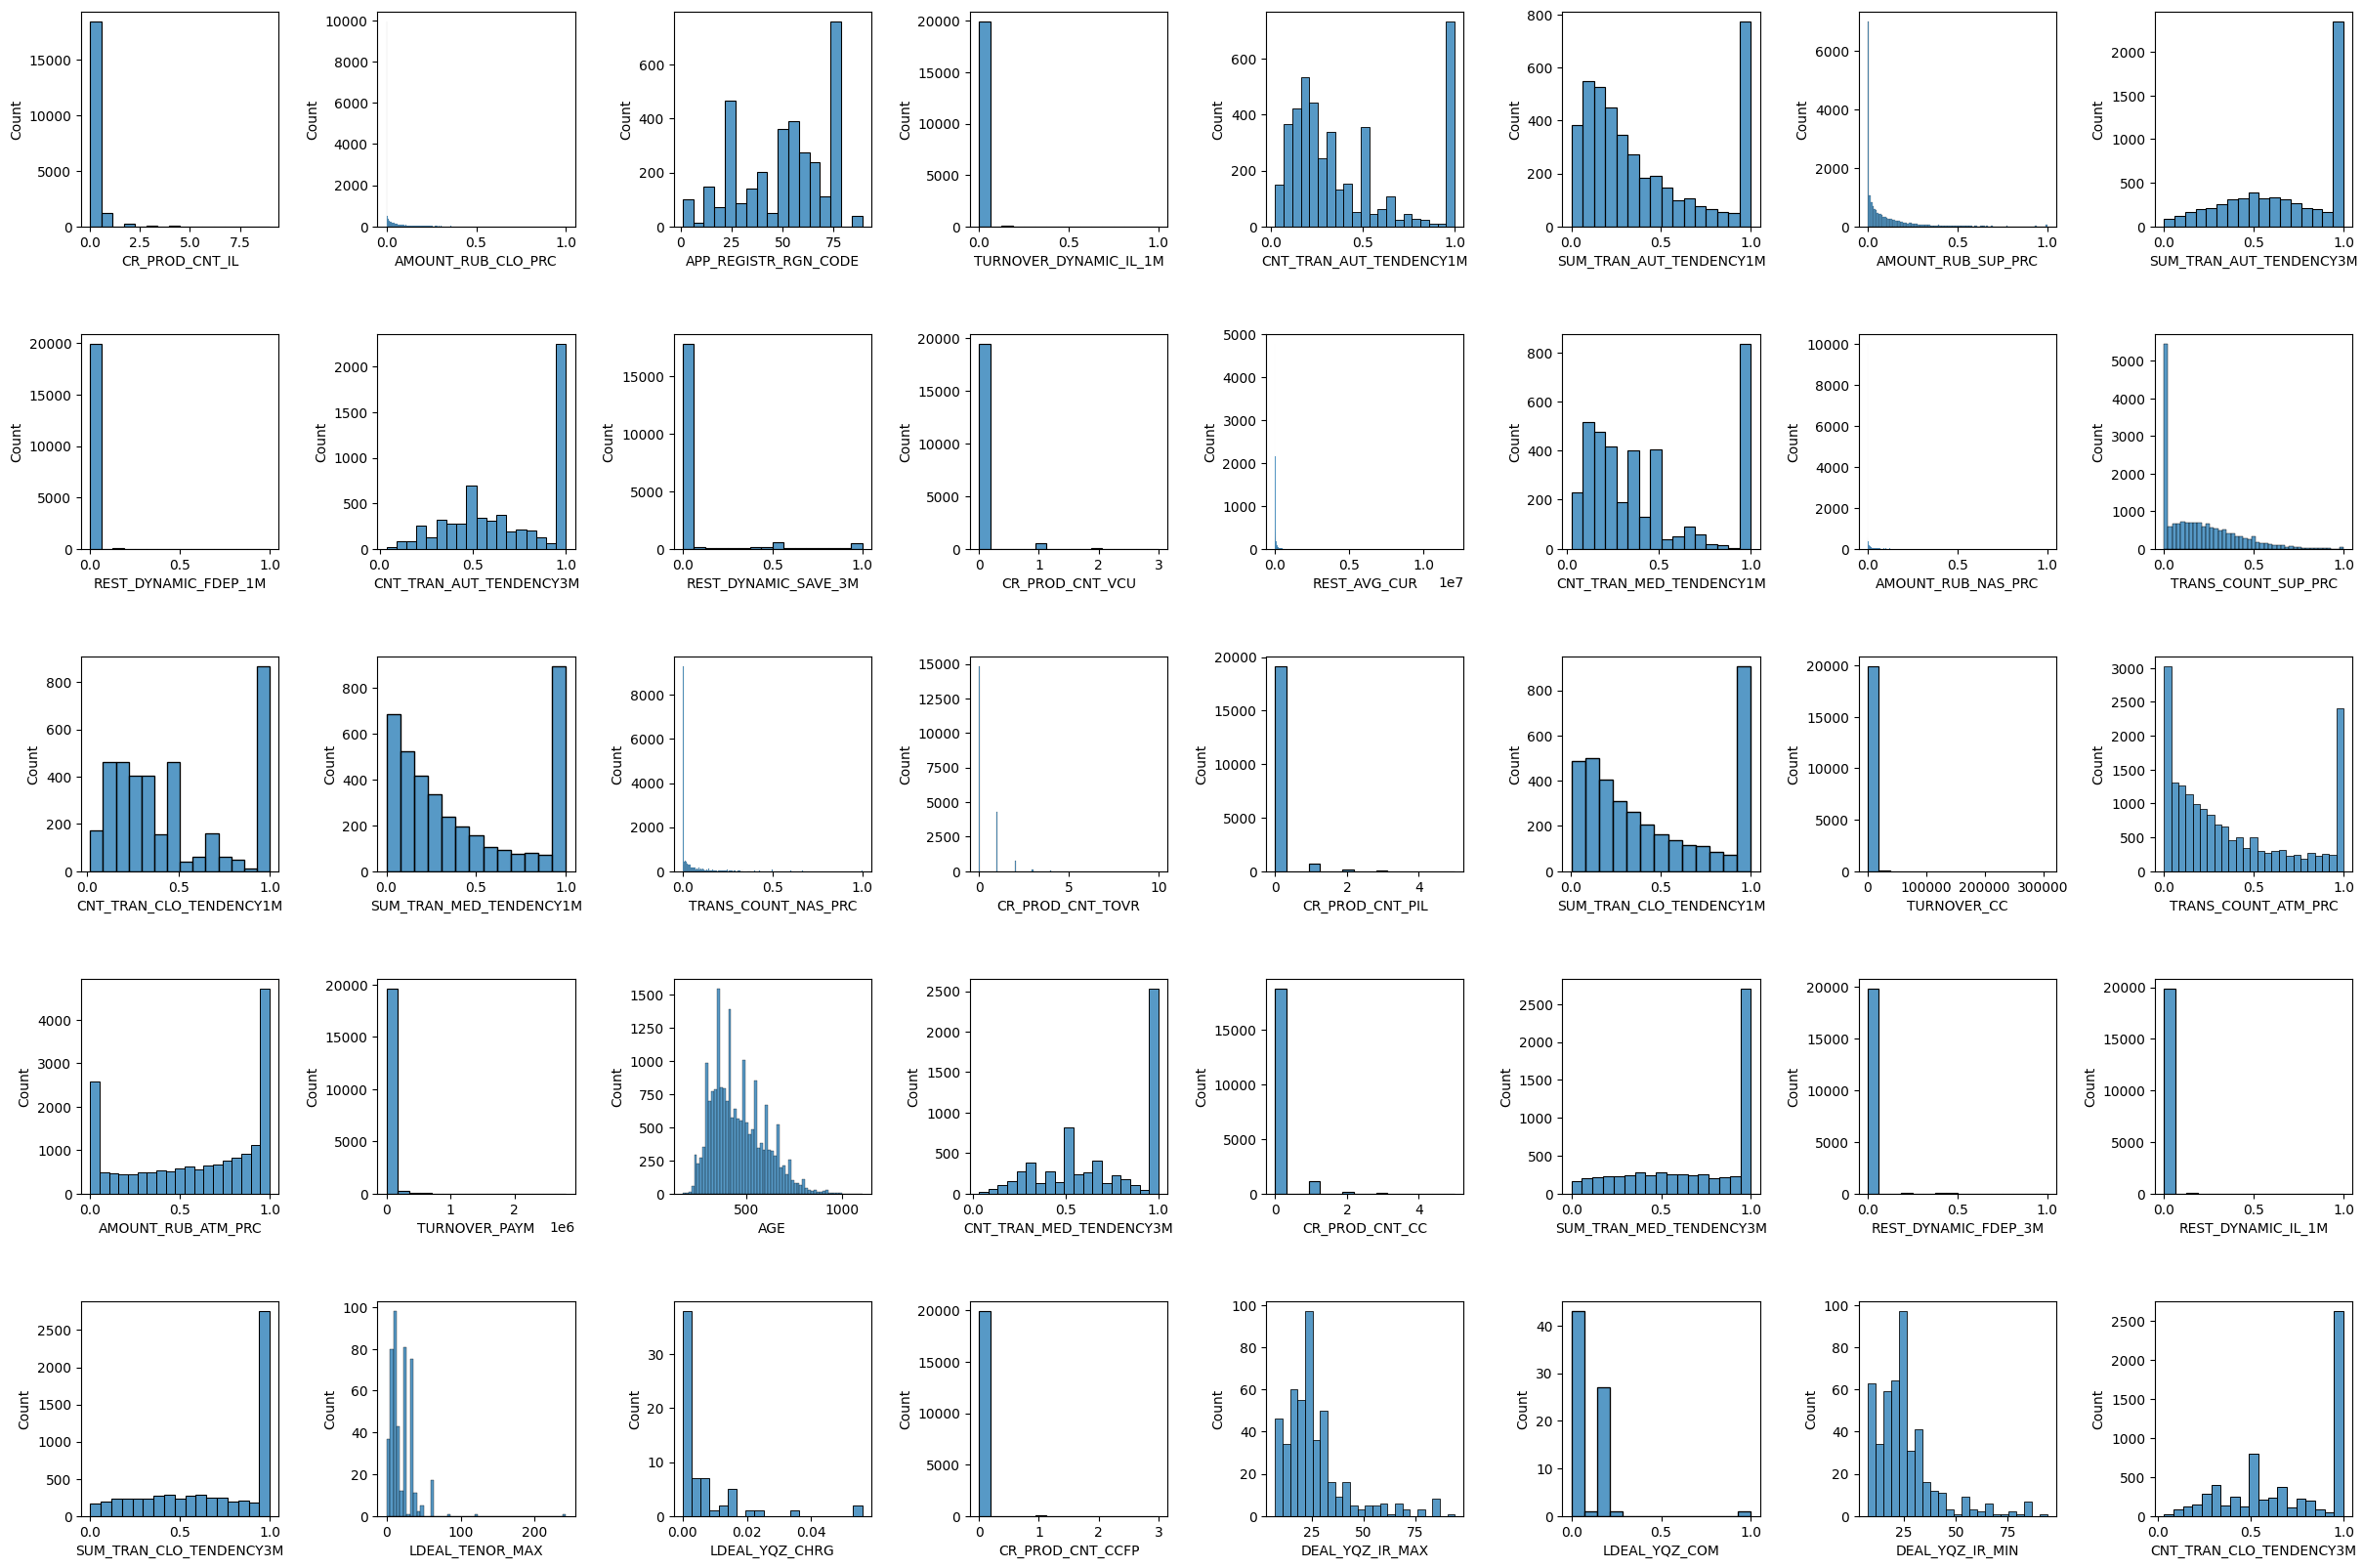

In [41]:
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(30, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ncolumns = numerical_train_df.columns
k=0
for i in range(5):
  for j in range(8):
    if k < len(ncolumns):
      sns.histplot(data=df, x=ncolumns[k], ax=axes[i][j])
      k+=1
plt.show()

# Bivariate Analysis

**Correlation Heatmap**

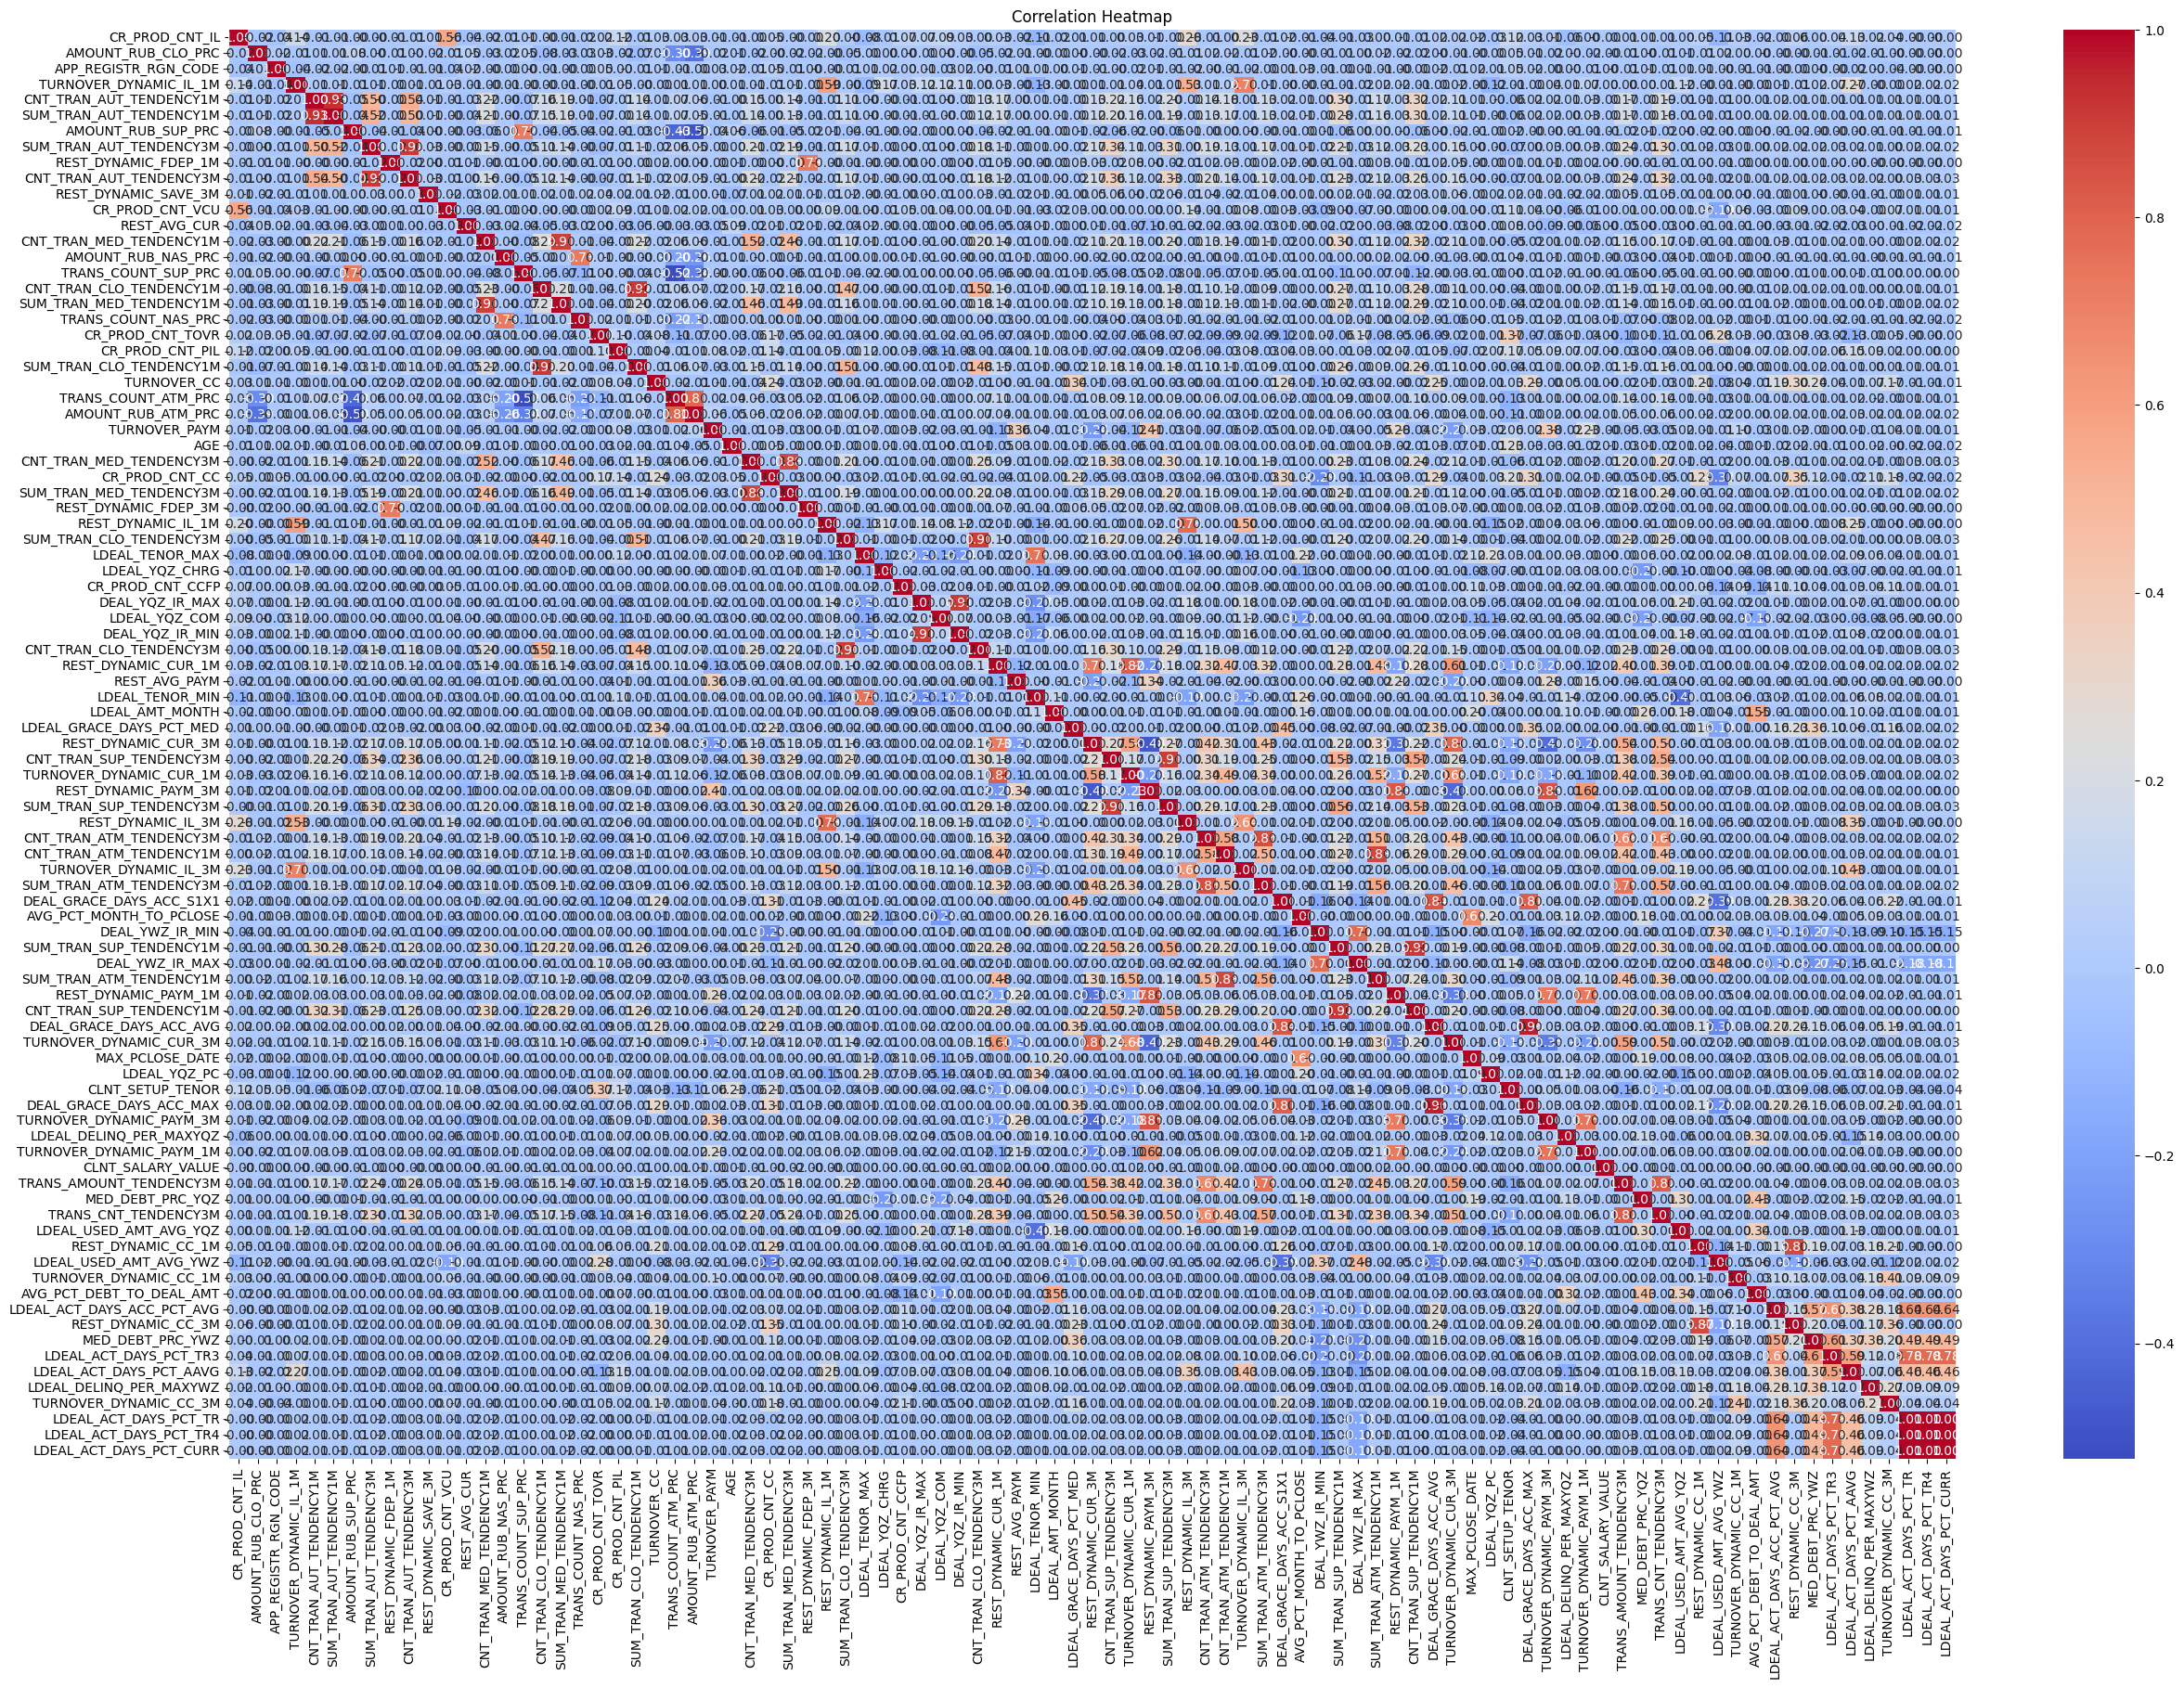

In [42]:
plt.figure(figsize=(30, 20))
sns.heatmap(numerical_train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Box plot**

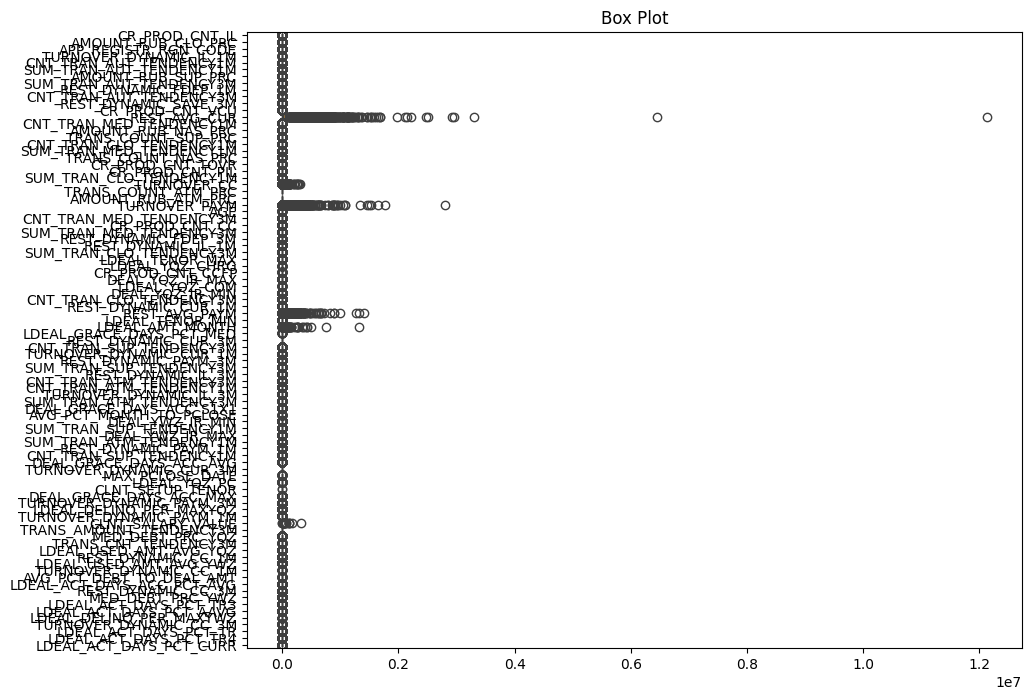

In [43]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=numerical_train_df, orient='h')
plt.title('Box Plot')
plt.show()

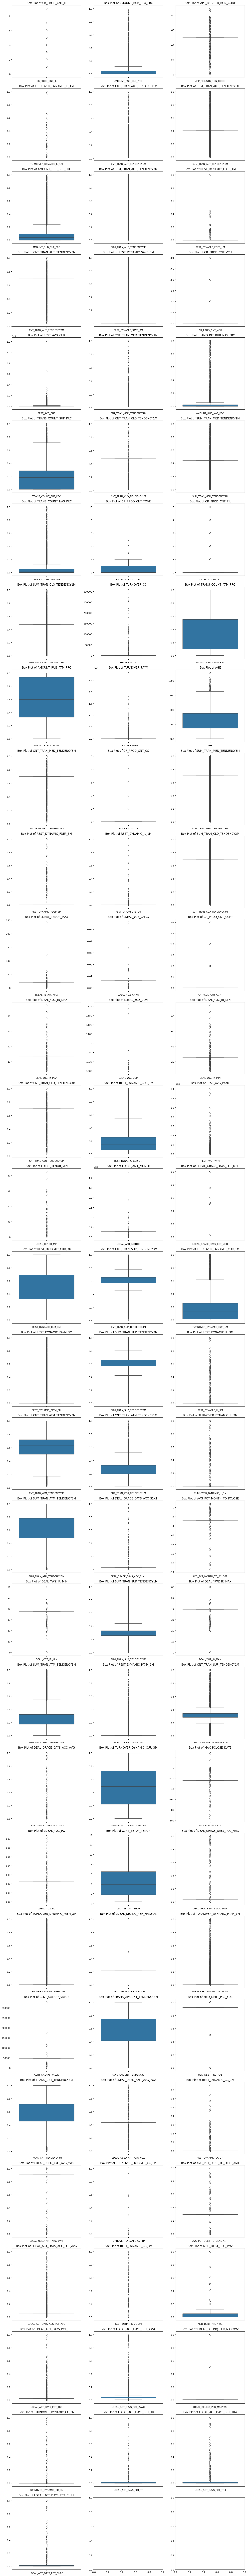

In [44]:
col = numerical_train_df.columns

# Defining the number of columns per row for the plot
num_columns = 3
num_rows = (len(col) // num_columns) + (len(col) % num_columns > 0)
# Defining the figure characteristics and axes for the box plot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(col):
      sns.boxplot(data=numerical_train_df, y=col, ax=axes[i])
      axes[i].set_title(f'Box Plot of {col}')
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('')
# Displaying the box plot
plt.tight_layout()
plt.show()

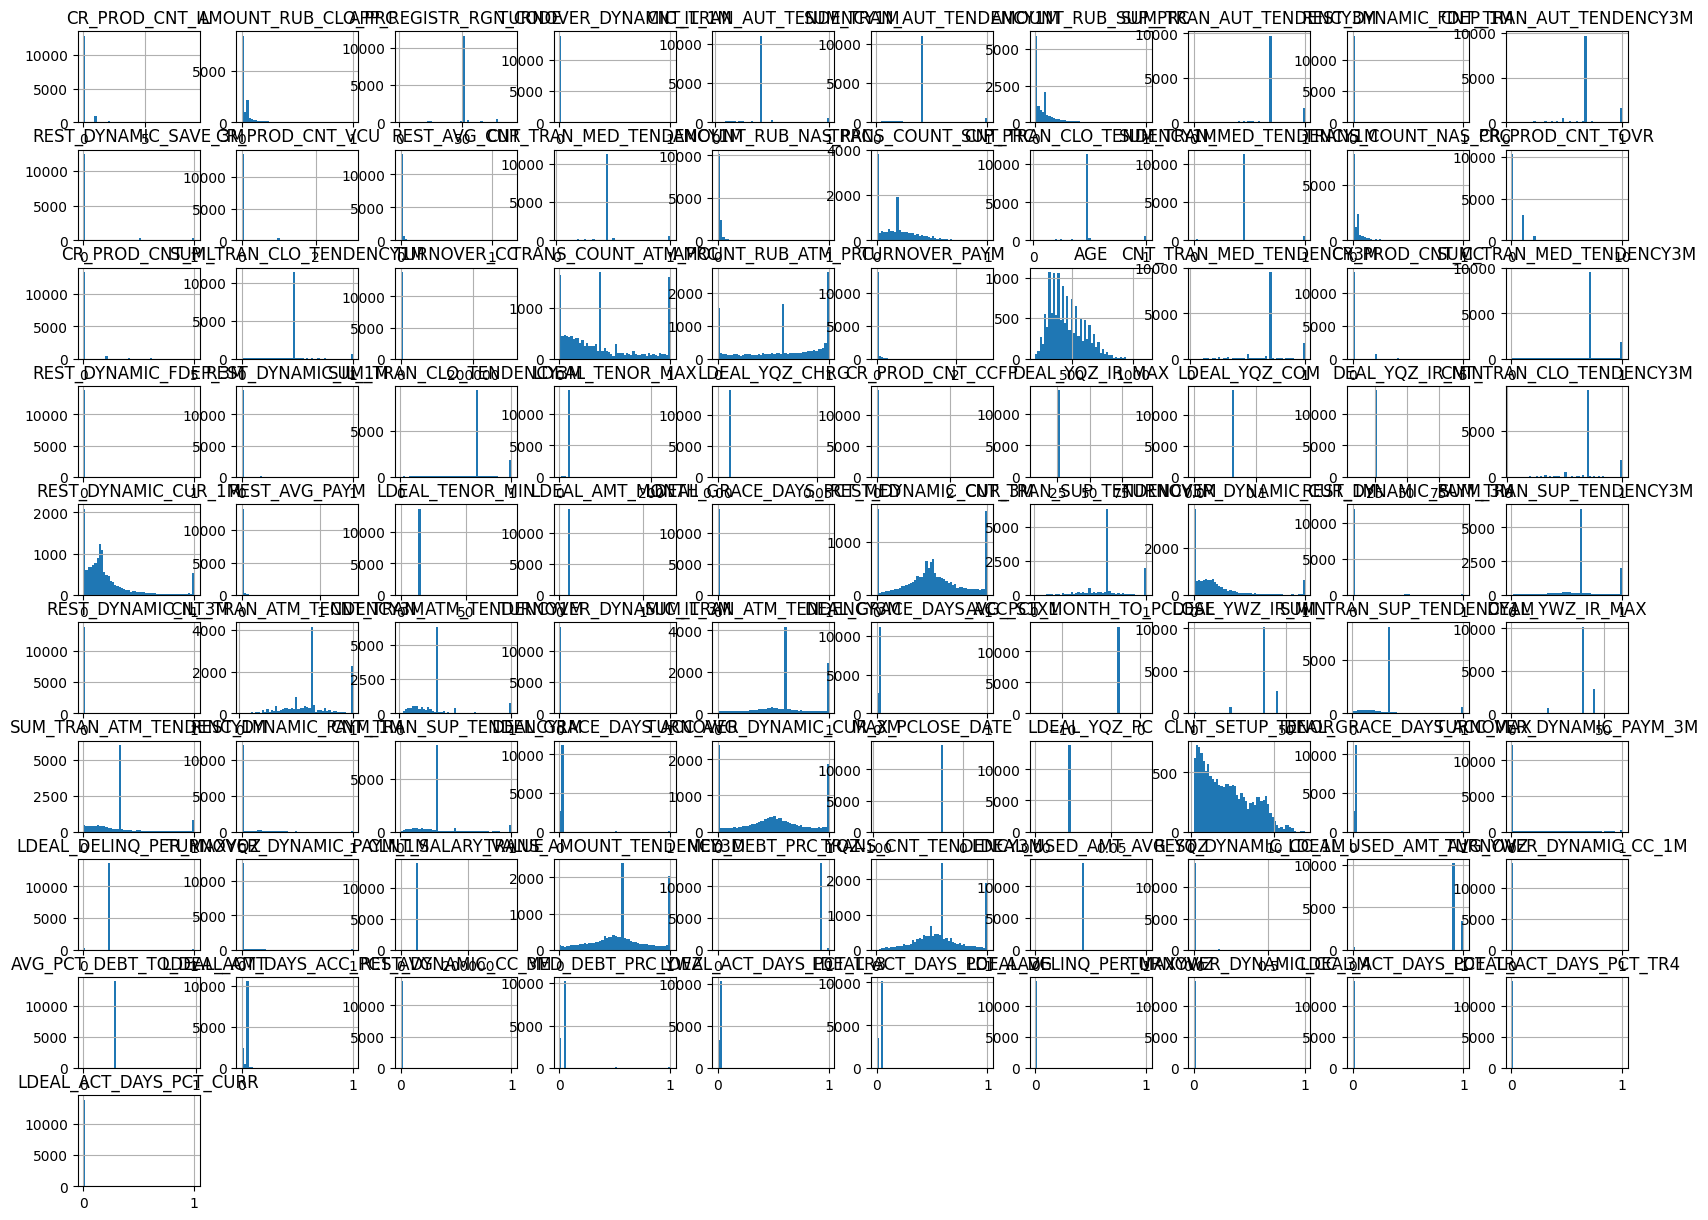

In [45]:
numerical_train_df.hist(bins=50, figsize=(20, 15))
plt.show()

**Summary (EDA)**

# Data Preprocessing

**Getting the numerical and categorical features of training data for data preprocessing**

In [46]:
# Numerical features of training data
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Categorical features of training data
categorical_features = X_train.select_dtypes(include=['object']).columns

In [47]:
# Function to print class imbalance ratio
def print_imbalance(y):
    class_counts = np.bincount(y)
    imbalance_ratio = class_counts[1] / class_counts[0]
    print(f"Imbalance ratio: {imbalance_ratio:.4f}")
    return y

def imbalance_scorer(y_true, y_pred):
    return imbalance_ratio(y_true)

In [48]:
# Preprocessing for numerical data of training data using Simple Imputer and Standard Scaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [49]:
# Preprocessing for categorical data of training data using Simple Imputer and One Hot Encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [50]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [51]:
# K-Fold Cross-Validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

In [53]:
# Create and train the logistic regression model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [54]:
# Handle NaN values in your target variable 'y'
# Choose an appropriate strategy based on your data and problem:

# 1. Remove rows with NaN in 'y' (if losing data is acceptable)
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]  # Adjust X accordingly if needed

# 2. Impute missing values with a suitable value (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')  # Choose an appropriate strategy
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Reshape and flatten

In [55]:
# After handling NaN values, proceed with cross-validation:
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

In [56]:
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

Cross-validation scores: [0.92071429 0.91785714 0.91928571 0.91571429 0.91785714 0.91928571
 0.91571429 0.92       0.91785714 0.91928571]
Mean cross-validation score: 0.9183571428571428


In [57]:
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

Imbalance in Train Data: 0.08898568761667704
Imbalance in Test Data: 0.08892921960072596


In [58]:
# from imblearn.over_sampling import SMOTE

# # Creating the SMOTE obj with the appropriate sampling strategy
# sm = SMOTE(sampling_strategy='auto', random_state=42)

# # Applying SMOTE to training data
# X_tr_sample, y_tr_sample = sm.fit_resample(X_train, y_train)

# # Print the shapes of the resampled data
# print("X_tr_sample Dataframe Shape {}".format(X_tr_sample.shape))
# print("y_tr_sample Dataframe Shape {}".format(y_tr_sample.shape))

# # Calculating and printing imbalance ratio in resampled training data
# data_imbalance = y_tr_sample.value_counts()[1] / y_tr_sample.value_counts()[0]
# print("Imbalance in Train Data: {}".format(data_imbalance))


**Grid Search Cross Validation**

In [59]:
# Define the parameter grid
logi_regession_model_params = {
    'classifier__penalty': ['none', 'l2'],
    'classifier__C': np.logspace(-4, 4, 10),
    'classifier__solver': ['newton-cg'],
    'classifier__max_iter': [100]
}

In [60]:
# Initializing GridSearchCV
logi_regession_model = GridSearchCV(estimator=model, param_grid=logi_regession_model_params, scoring='accuracy', cv=2, verbose=True, n_jobs=-1)

**Logistic Regression**

In [61]:
# Fit the model
logi_regession_model.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'APP_REGISTR_RGN_CODE',
       'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_RUB_SUP...
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'classifier__max_iter': [100],
                         'classifier__penalty': ['none', 'l2'],
                         'classifier__solver': ['newton-cg']},
             scoring='accuracy', verbose=True)

**Predicting Data**

In [62]:
# Generate predictions on the test data
y_pred = logi_regession_model.predict(X_test)

In [63]:
# Now calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

**Accuracy**

In [64]:
print("Accuracy:", accuracy)

Accuracy: 0.9183333333333333


**Confusion Matrix**

In [65]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[5510    0]
 [ 490    0]]


**Classification Report**

In [66]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      5510
           1       0.00      0.00      0.00       490

    accuracy                           0.92      6000
   macro avg       0.46      0.50      0.48      6000
weighted avg       0.84      0.92      0.88      6000



**SVM (Support Vector Machine)**

In [67]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Retain 95% variance
    ('classifier', LinearSVC(class_weight='balanced', dual=False, random_state=42))
])

In [68]:
# Parameter grid
param_distributions = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__loss': ['squared_hinge'],
    'classifier__max_iter': [1000, 5000, 10000]
}

In [69]:
# Randomized search
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, random_state=42)

In [70]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'APP_REGISTR_RGN_CODE',
       'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_R...
       'APP_DRIVING_LICENSE', 'APP_EDUCATION', 'APP_TRAVEL_PASS', 'APP_CAR',
       'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE', 'PACK'],
      dtype='object'))])),
                                             ('pca', PCA(n_components=0.95)),
                                             ('classifier',
                                              LinearSVC(class_weight='balanced',
                                                        dual=False,
                                                        random_state=42))]),
                   param_distributions={'classifier__C': [0.1, 1, 10, 100],
                                        'classifier__loss': ['squared_hinge'],
                                        'classifier__max_iter': [1000, 5000,
                                                                 10000]},
                   random_state=42)

**Best hyperparameters and scores**

In [71]:
# After fitting, you can get the best hyperparameters and the corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best hyperparameters and score
print(f"Best parameters: {best_params}")
print(f"Best roc_auc : {best_score:.4f}")

Best parameters: {'classifier__max_iter': 1000, 'classifier__loss': 'squared_hinge', 'classifier__C': 0.1}
Best roc_auc : 0.6330


In [72]:
# Get the best estimator
best_model = random_search.best_estimator_

In [73]:
# Make predictions on the test set (replace X_test with your test set)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.decision_function(X_test)  # Use decision_function for LinearSVC

In [74]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

**Accuracy**

In [75]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8912


**Confusion Matrix**

In [76]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5274  236]
 [ 417   73]]


**Classification Report**

In [77]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5510
           1       0.24      0.15      0.18       490

    accuracy                           0.89      6000
   macro avg       0.58      0.55      0.56      6000
weighted avg       0.87      0.89      0.88      6000



**ROC AUC**

In [78]:
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.6994


**ROC Curve**

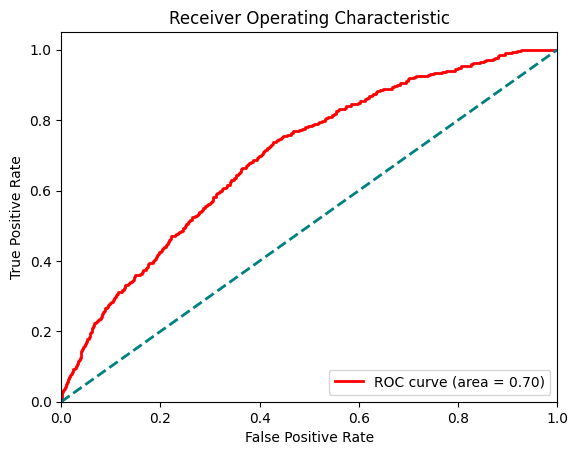

In [79]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='teal', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Confusion Matrix**

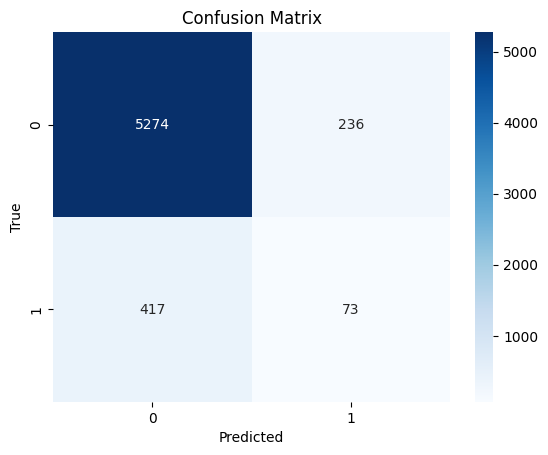

In [80]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Assignment 5**

**Logistic Regression Sensitivity Analysis**

In [81]:
# Logistic regression model and sensitivity analysis
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=10000))])

In [82]:
param_distributions_logistic = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['liblinear']
}

In [83]:
random_search_logistic = RandomizedSearchCV(logistic_pipeline, param_distributions_logistic, n_iter=5, cv=5, random_state=42)

In [84]:
random_search_logistic.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'APP_REGISTR_RGN_CODE',
       'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_R...
                   param_distributions={'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'classifier__penalty': ['l1', 'l2'],
                                        'classifier__solver': ['liblinear']},
                   random_state=42)

In [85]:
best_logistic_model = random_search_logistic.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_conf_matrix = confusion_matrix(y_test, y_pred_logistic)
logistic_class_report = classification_report(y_test, y_pred_logistic)
logistic_roc_auc = roc_auc_score(y_test, y_pred_logistic)

In [86]:
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")
print("Logistic Regression Confusion Matrix:")
print(logistic_conf_matrix)
print("Logistic Regression Classification Report:")
print(logistic_class_report)
print(f"Logistic Regression ROC AUC: {logistic_roc_auc:.4f}")

Logistic Regression Accuracy: 0.9183
Logistic Regression Confusion Matrix:
[[5510    0]
 [ 490    0]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5510
           1       0.00      0.00      0.00       490

    accuracy                           0.92      6000
   macro avg       0.46      0.50      0.48      6000
weighted avg       0.84      0.92      0.88      6000

Logistic Regression ROC AUC: 0.5000


Support Vector Machine and Sensitivity Analysis

In [87]:
# svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('classifier', LinearSVC(class_weight='balanced', dual=False, random_state=42))])

svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(kernel='linear', probability=True))])

In [88]:
param_distributions_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__max_iter': [1000, 5000, 10000]
}

# param_distributions_svm = {
#     'classifier__C': [0.1, 1, 10, 100],
#     'classifier__loss': ['squared_hinge'],
#     'classifier__max_iter': [1000, 5000, 10000]
# }

In [89]:
# random_search_svm = RandomizedSearchCV(svm_pipeline, param_distributions_svm, n_iter=10, cv=5, random_state=42, n_jobs = -1, verbose=1)
random_search_svm = RandomizedSearchCV(svm_pipeline, param_distributions_svm, n_iter=5, cv=5, random_state=42, n_jobs = -1, verbose=1)

In [90]:
random_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'APP_REGISTR_RGN_CODE',
       'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_R...
       'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION_TYPE',
       'APP_DRIVING_LICENSE', 'APP_EDUCATION', 'APP_TRAVEL_PASS', 'APP_CAR',
       'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE', 'PACK'],
      dtype='object'))])),
                                             ('classifier',
                                              SVC(kernel='linear',
                                                  probability=True))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'classifier__C': [0.1, 1, 10, 100],
                                        'classifier__max_iter': [1000, 5000,
                                                                 10000]},
                   random_state=42, verbose=1)

In [91]:
best_svm_model = random_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_class_report = classification_report(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, best_svm_model.predict_proba(X_test)[:, 1])

**SVM Accuracy, Confusion matrix, Classification report & ROC AUC**

In [92]:
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print("SVM Classification Report:")
print(svm_class_report)
print(f"SVM ROC AUC: {svm_roc_auc:.4f}")

SVM Accuracy: 0.6367
SVM Confusion Matrix:
[[3644 1866]
 [ 314  176]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      5510
           1       0.09      0.36      0.14       490

    accuracy                           0.64      6000
   macro avg       0.50      0.51      0.45      6000
weighted avg       0.85      0.64      0.72      6000

SVM ROC AUC: 0.5096


In [93]:
import pickle
# pickle_out = open("Bank_customer_churn.pkl","wb")
# pickle.dump(best_svm_model, pickle_out)
# pickle_out.close()

## HTML Creation

In [110]:
!jupyter nbconvert --to html ML_Assignment_6.ipynb

[NbConvertApp] Converting notebook ML_Assignment_6.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 6751636 bytes to ML_Assignment_6.html


In [111]:
from google.colab import files
files.download('ML_Assignment_6.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
import site
print(site.getsitepackages())

['/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.10/dist-packages']


In [105]:
!pip install Flask

  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)


In [106]:
# Save Logistic Regression model
with open("log_reg_model.pkl", "wb") as f:
    pickle.dump(best_logistic_model, f)

# Save SVM model
with open("svm_model.pkl", "wb") as f:
    pickle.dump(best_svm_model, f)

In [107]:
files.download('log_reg_model.pkl')
files.download('svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Interpretation using LIME**

In [ ]:
# # LIME interpretation
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_train),
#     feature_names=X_train.columns,
#     class_names=[str(i) for i in np.unique(y_train)],
#     mode='classification'
# )

In [ ]:
# i = 0  # index of the instance to interpret
# exp = explainer.explain_instance(X_test.iloc[i], best_svm_model.decision_function, num_features=5)
# exp.show_in_notebook(show_table=True)

In [ ]:
# exp.as_pyplot_figure()

**Interpreation using SHAP**

In [ ]:
# # SHAP interpretation
# explainer_shap = shap.Explainer(best_svm_model['classifier'], X_train)
# shap_values = explainer_shap(X_test)

In [ ]:
# # Plot SHAP values for the first instance
# shap.initjs()
# shap.plots.waterfall(shap_values[0])

In [ ]:
# # Global feature importance
# shap.plots.bar(shap_values)

# Summary

In [ ]:
# Summary
print("From the sensitivity analysis of the Logistic Regression model, we understand the effect of each hyperparameter.")
print("LIME and SHAP interpretations help us understand local and global feature importance for the SVM model.")

From the sensitivity analysis of the Logistic Regression model, we understand the effect of each hyperparameter.
LIME and SHAP interpretations help us understand local and global feature importance for the SVM model.
